# Lab 2

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.io import wavfile

%matplotlib inline

## Question 1
Write a function *linconv(h,x)* to convolve two input sequences using the expression for linear convolution.

In [ ]:
def linconv(h, x):
  N1 = len(h)
  N2 = len(x)
  N = N1 + N2 - 1
  h = np.append(h,np.zeros(N-N1))
  x = np.append(x,np.zeros(N-N2))
  y = np.zeros(N)

  for n in range (N):
    for k in range (N):
        if n >= k:
             y[n] = y[n] + x[n-k] * h[k]

  return y

In [ ]:
print(linconv([1,2,3,3,2,1],[1,2,3,4,5]))

[ 1.  4. 10. 19. 30. 36. 35. 26. 14.  5.]


## Question 2
Write another function *freqconv(h,x)* to perform the linear convolution of h and x using their ffts.

In [ ]:
def freqconv(h, x):
  N1 = len(h)
  N2 = len(x)
  N = N1 + N2 - 1
  h = np.append(h,np.zeros(N-N1))
  x = np.append(x,np.zeros(N-N2))
  H = np.fft.fft(h)
  X = np.fft.fft(x)
  y = np.fft.ifft(H * X).real
  return y

In [ ]:
print(freqconv([1,2,3,3,2,1],[1,2,3,4,5]))

[ 1.  4. 10. 19. 30. 36. 35. 26. 14.  5.]


##Question 3
Write a function to generate 1000 samples of a periodic train of pulses, with a period T, specified by the user.

In [ ]:
def pulsetrain(T):
  T = T * 2
  N = 1000
  D = T/2
  rect = np.arange(N) % T < D
  return rect

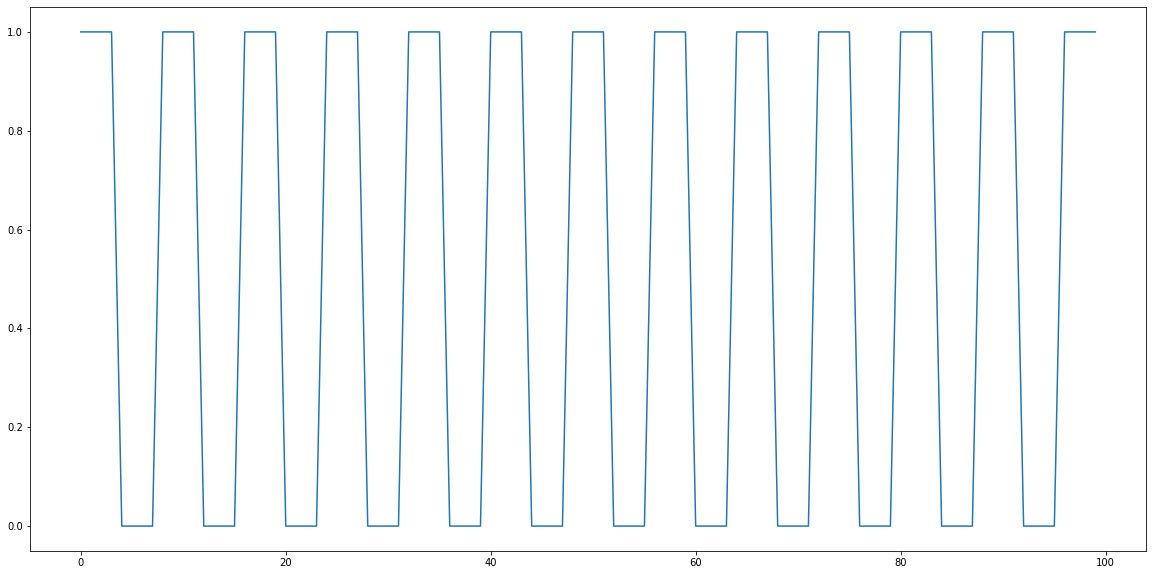

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(pulsetrain(4)[:100])
plt.show()

##Question 4
Define a vector h = [1,2,3,4] and convolve it with a pulse train with periods of T=1,2,3,4; what do you observe?

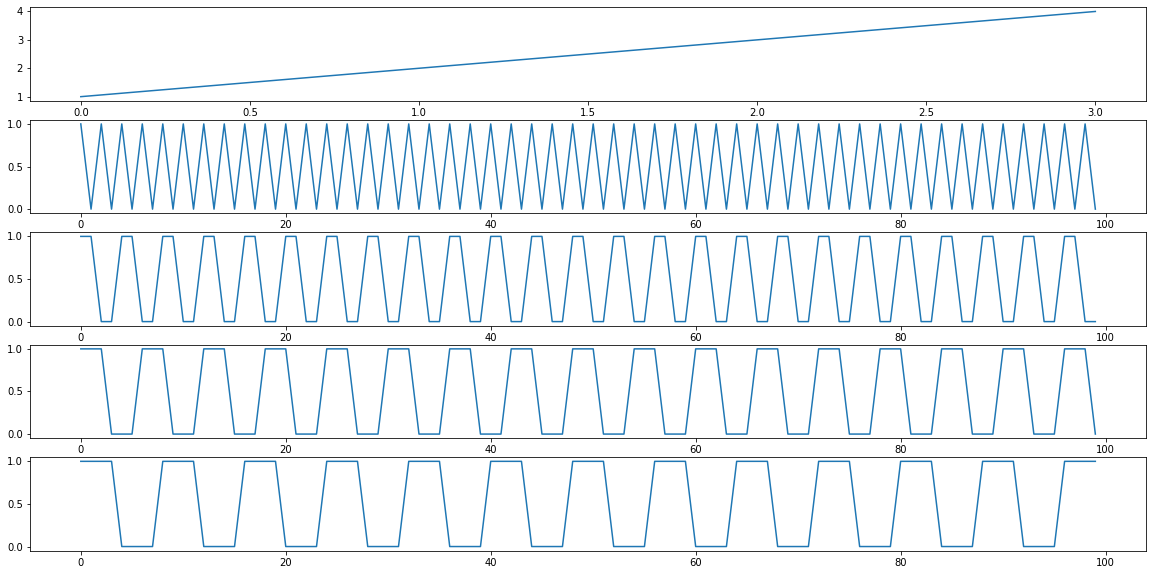

In [ ]:
h = [1,2,3,4]

t1 = pulsetrain(1)
t2 = pulsetrain(2)
t3 = pulsetrain(3)
t4 = pulsetrain(4)

plt.figure(figsize=(20,10))
plt.subplot(511)
plt.plot(h)

plt.subplot(512)
plt.plot(t1[:100])

plt.subplot(513)
plt.plot(t2[:100])

plt.subplot(514)
plt.plot(t3[:100])

plt.subplot(515)
plt.plot(t4[:100])

plt.show()

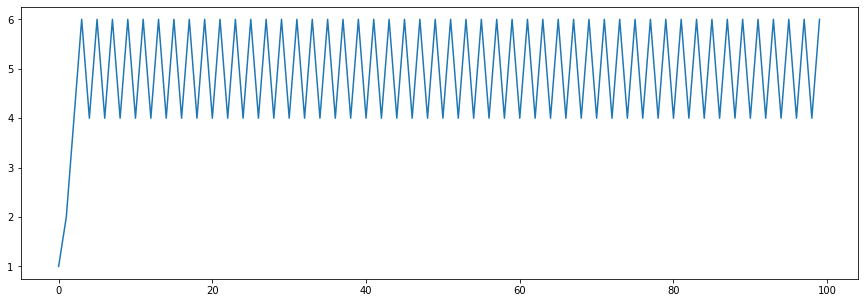

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(freqconv(h,t1)[:100])
plt.show()

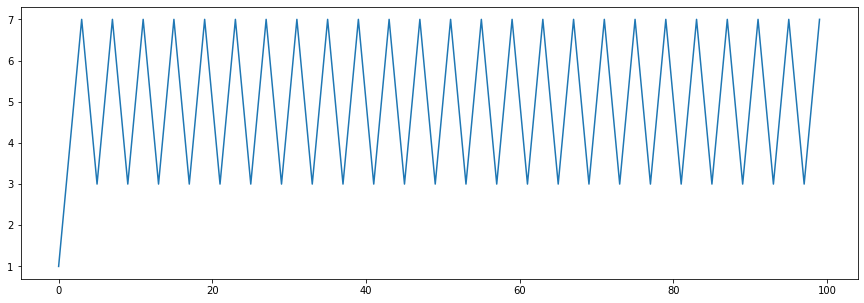

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(freqconv(h,t2)[:100])
plt.show()

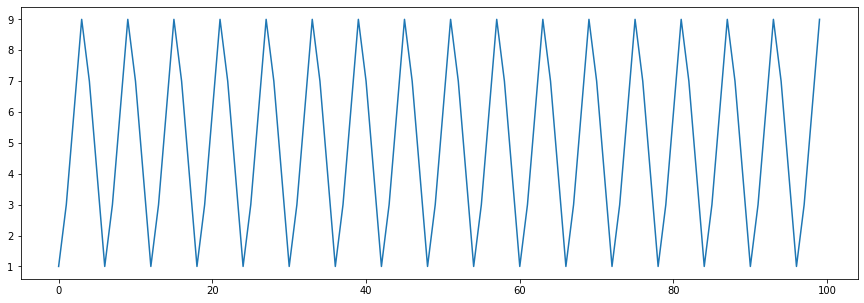

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(freqconv(h,t3)[:100])
plt.show()

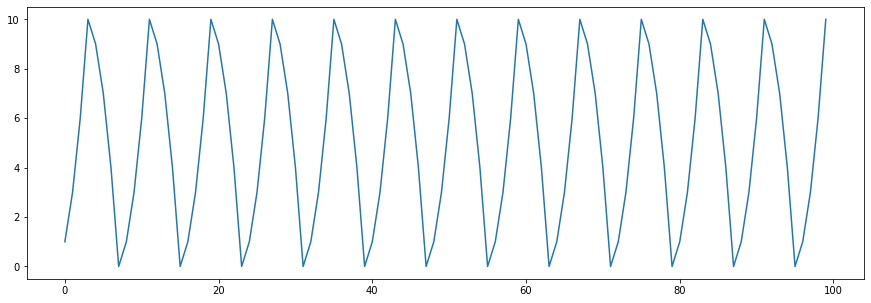

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(freqconv(h,t4)[:100])
plt.show()

##Question 5
Sample your voice at 8kHz for 2 seconds and pass it through an arbitrary, length 16 FIR filter using:

a) Direct Linear convolution

b) Linear Convolution using FFT

c) The overlap-add method for block lengths: 64, 128, 256 and 512

d) The overlap save method for block length: 64, 128, 256, and 512

In each of the above cases, obtain the total number of required real multiplications, and using that as an indication of computational complexity, comment on the optimal block size for overlap add and overlap save implementation of linear convolution.

In [ ]:
rate, data = wavfile.read('./output.wav')

In [ ]:
audio = []
for i in range(0,len(data)):
  audio.append((data[i][0] + data[i][1]) / 2)

filter = np.ones(16)

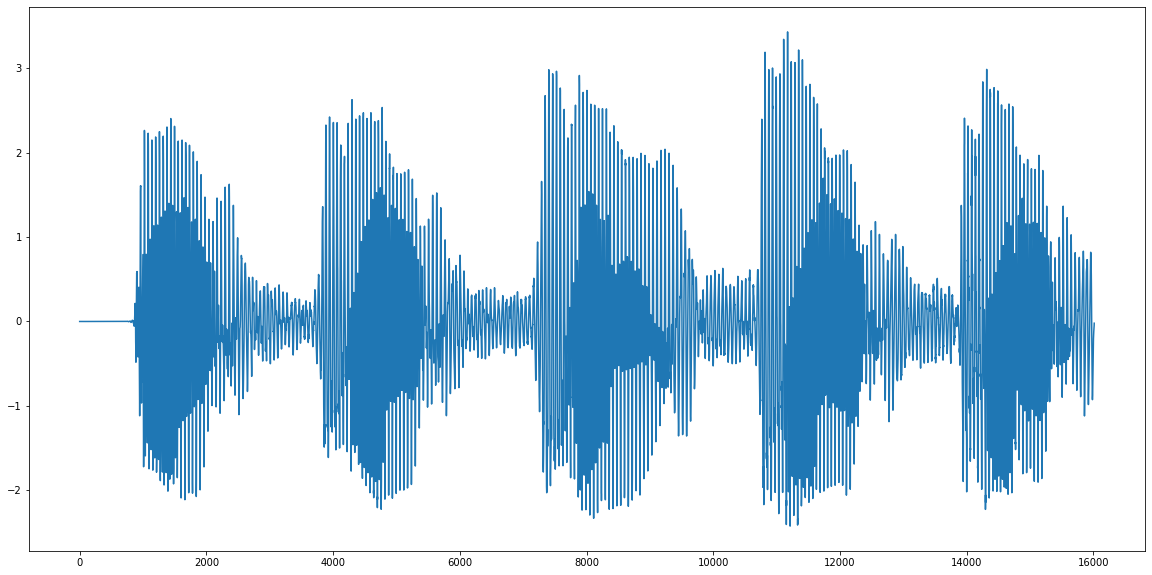

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(linconv(filter, audio))
plt.show()

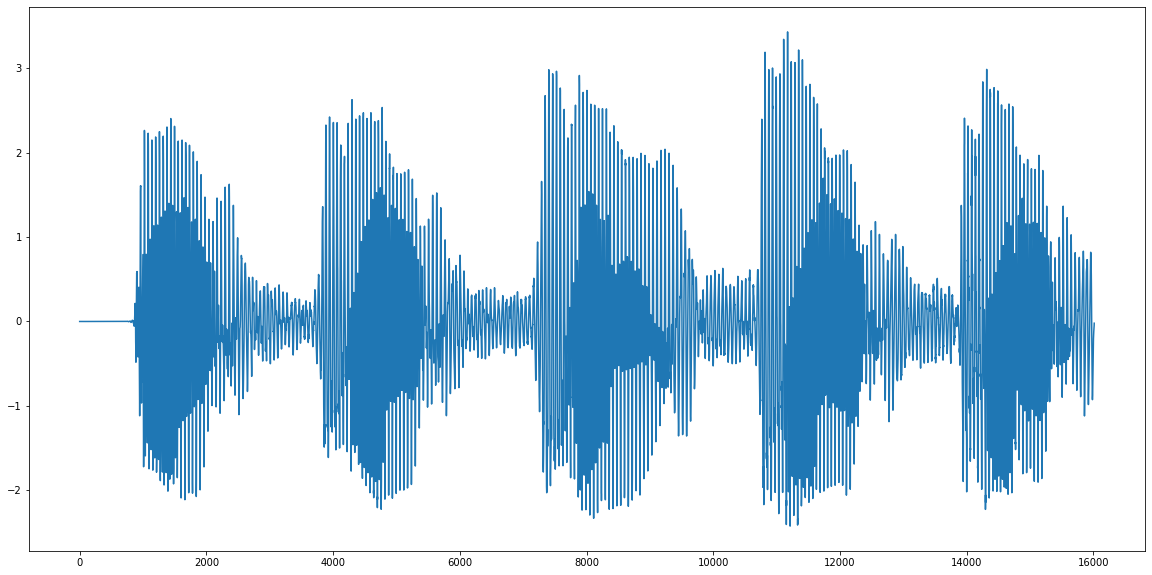

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(freqconv(filter, audio))
plt.show()

In [ ]:
def overlapAdd(data,fir,blocksize):
    D = len(data)
    M = len(fir)
    L = D+M-1
    y = np.zeros(L)
    pn = np.ceil(D/blocksize)
    for p in range(0,int(pn)):
        x = data[p*blocksize:min((p+1)*blocksize,D)]
        conv = freqconv(x,fir)
        conv = np.concatenate((np.zeros(p*blocksize),conv))
        conv = np.concatenate((conv,np.zeros(L-len(conv))))
        y += conv
    return y

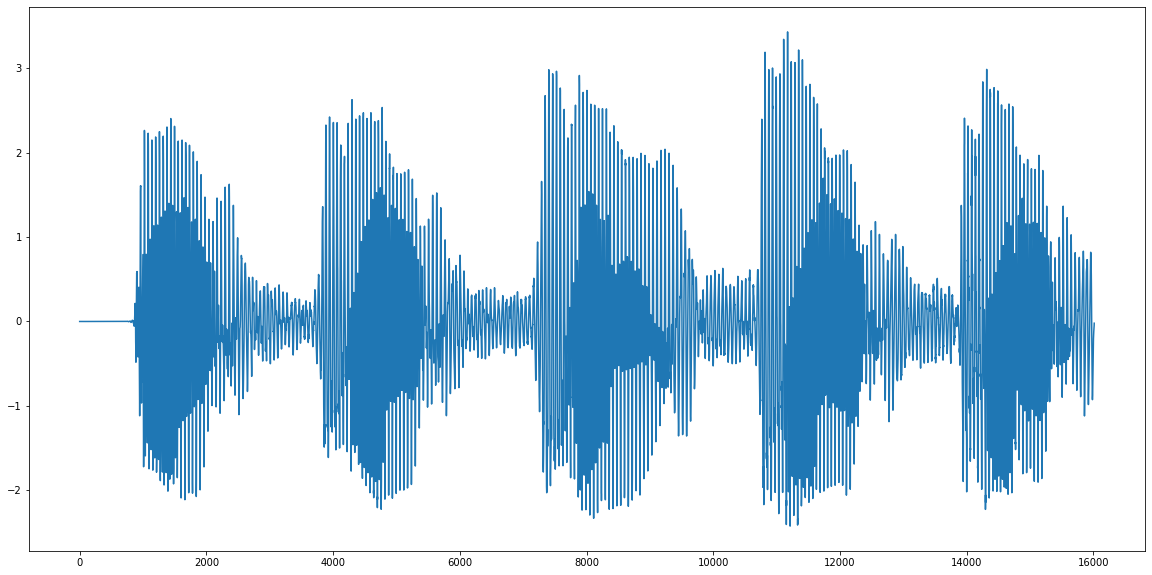

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(overlapAdd(audio,filter,64))
plt.show()

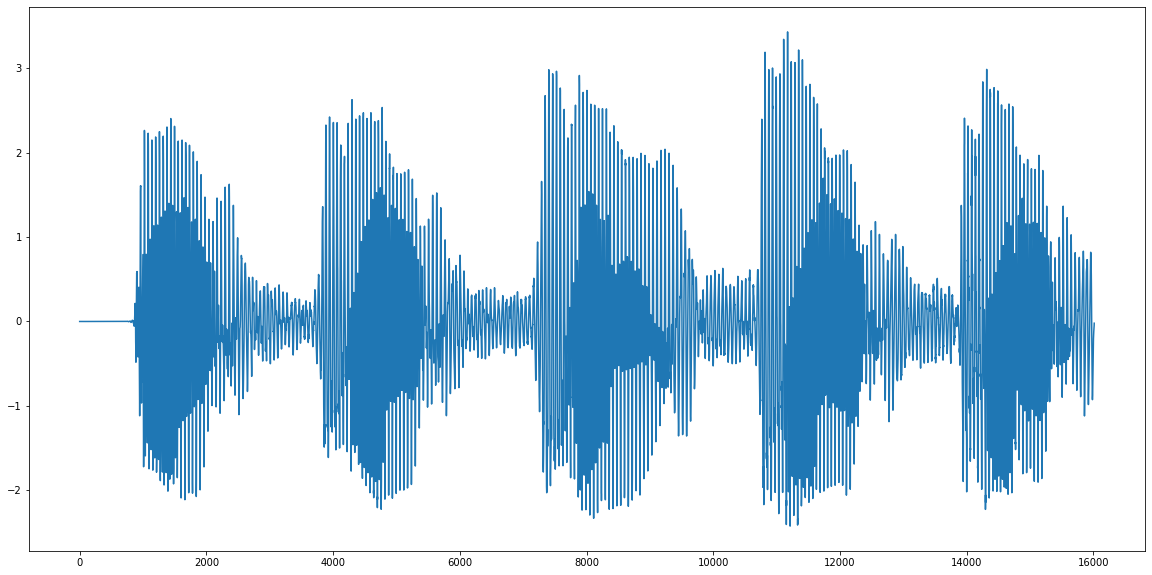

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(overlapAdd(audio,filter,128))
plt.show()

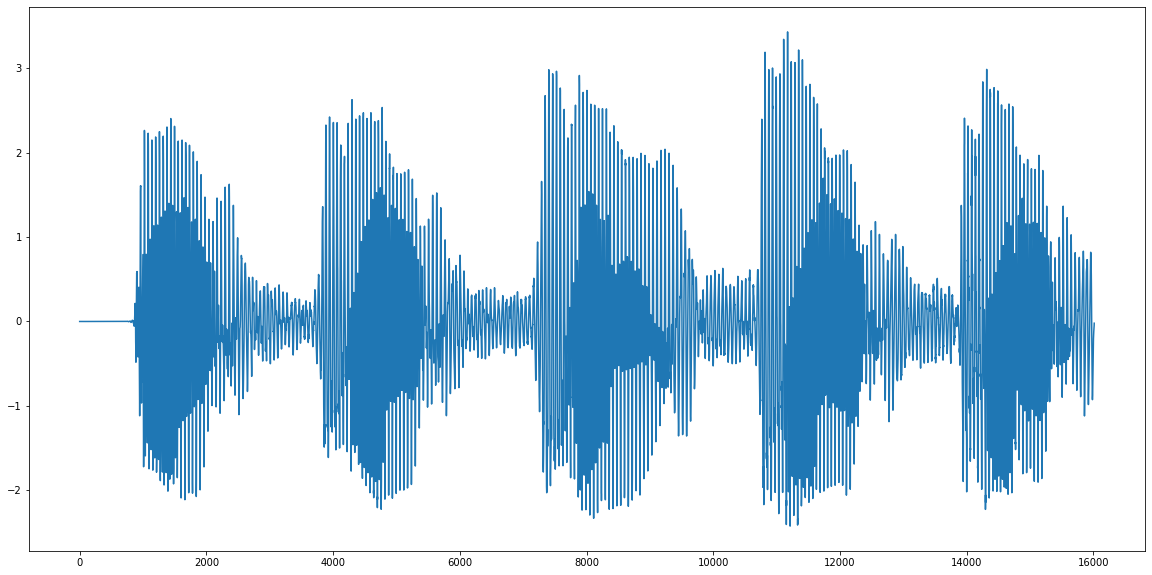

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(overlapAdd(audio,filter,256))
plt.show()

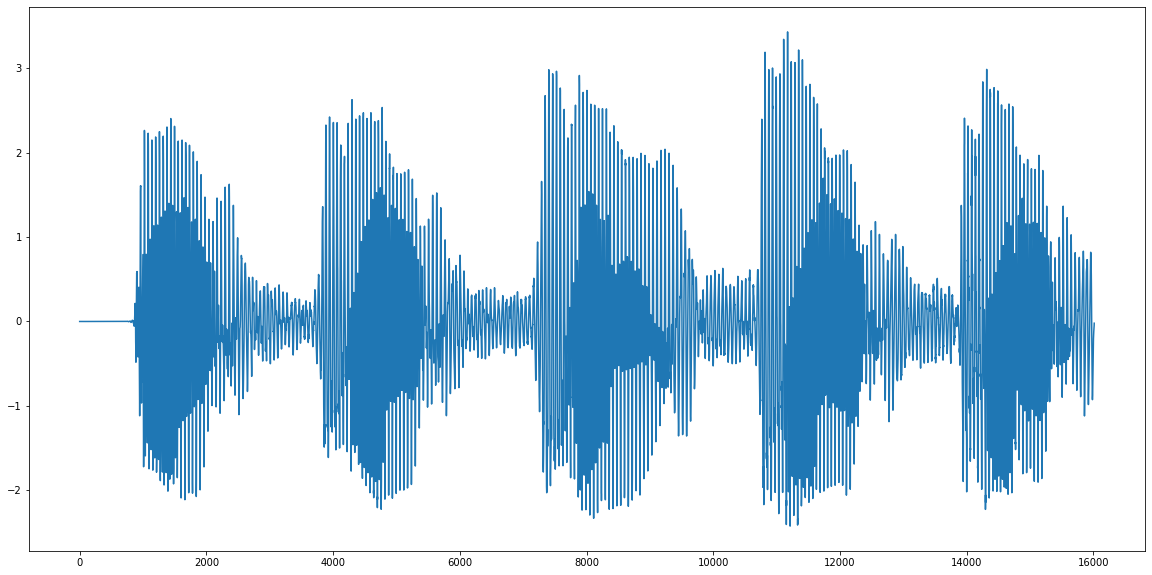

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(overlapAdd(audio,filter,512))
plt.show()

In [ ]:
## overlapSave

##Question 6
Write a function myquant(x,L) to quantize the input vector into L uniformly spaced intervals.

In [ ]:
import math

def myquant(x,l):
    y=[]
    z=[]
    for i in range(0,len(x)):
        z.append(x[i])
    for i in range(0,l):
        y.append([])
    inter=(max(x)-min(x))/l
    m=min(x)
    mid=m+inter/2
    tmp=[mid]
    for i in range(0,l-1):
        mid+=inter
        tmp.append(mid)
    for i in range(0,len(x)):
        ind=0
        val=abs(x[i]-tmp[0])
        for j in range(0,l):
            if abs(x[i]-tmp[j])<val:
                val=abs(x[i]-tmp[j])
                ind=j
        y[ind].append(x[i])
        z[i]=tmp[ind]
    return [tmp,y,z]

In [ ]:
x=[1,2,3,4,5,6,7,14]
l=3
[myquant(x,l)[2],x]

[[3.1666666666666665,
  3.1666666666666665,
  3.1666666666666665,
  3.1666666666666665,
  3.1666666666666665,
  7.5,
  7.5,
  11.833333333333332],
 [1, 2, 3, 4, 5, 6, 7, 14]]

##Question 7
Use the mean squared error function defined in the previous lab sheet to plot the quantization mean squared error as a function of L. Write down your observations.

In [ ]:
def MSE(x,z):
    res=[]
    for i in range(0,len(x)):
        res.append((x[i]-z[i])**2)
    return sum(res)/len(res)

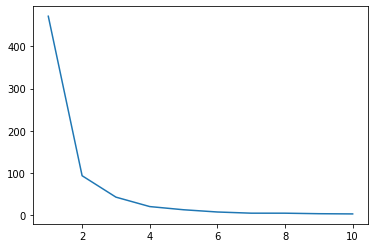

In [ ]:
x=[1,2,3,4,5,6,7,11,13,15,18,21,3,55,6,35,2,56]
x1=x
l=[]
rest=[]
for i in range(1,11):
    l.append(i)
    ok=myquant(x1,i)[2]
    rest.append(MSE(x,ok))
plt.figure(figsize=(20,10))
plt.plot(l,rest)
plt.show()

##Question 8
Take a five second audio sample of your choice and pass it through the quantizer designed in Question 6. Observe the effect of mean squared quantization error on the perceptual quality of the audio sample.

In [ ]:
rate, data = wavfile.read('./output.wav')

In [ ]:
tes1=[]
tes2=[]
for i in range(0,len(data)):
    tes1.append(data[i][0])
    tes2.append(data[i][1])
myquant(tes1,1000)[2]    
myquant(tes2,1000)[2]

##Question 9
Modify the function myquant(x,L) to lev quant(x,v) that takes another vector v as an input and quantizes the points in x around the points in v according to the nearest neighbors approach.

In [ ]:
def levquant2(x,v):
    y=[]
    z=x
    for i in range(0,len(v)):
        y.append([])
    for i in range(0,len(x)):
        ind=0
        val=x[i]-v[0]
        for j in range(0,len(v)):
            if abs(x[i]-v[j])<val:
                val=x[i]-v[j]
                ind=j
        y[ind].append(x[i])
        z[i]=v[ind]
    return [y,z]

In [ ]:
x=[1,2,3,4,6,7,11]
v=[2,5]
levquant2(x,v)

[[[1, 2, 3], [4, 6, 7, 11]], [2, 2, 2, 5, 5, 5, 5]]

##Question 10
Extend levquant(x,v) to handle complex numbers. Write down the changes that you needed to consider in the notebook.

In [ ]:
def dist(x,y):
    return (((x[0]-y[0])**2) + ((x[1]-y[1])**2))

def levquant2d(x,v):
    y=[]
    
    for i in range(0,len(v)):
        y.append([])
    for i in range(0,len(x)):
        ind=0
        val=dist(x[i],v[0])
        for j in range(0,len(v)):
            if dist(x[i],v[j])<val:
                val=dist(x[i],v[j])
                ind=j
        y[ind].append(x[i])
    return y

In [ ]:
x=[[1,2],[3,4],[6,0],[7,1],[11,5]]
v=[[2,3],[5,3]]
levquant2d(x,v)

[[[1, 2], [3, 4]], [[6, 0], [7, 1], [11, 5]]]

##Question 11
Use the function myquant(x,L) to plot the histogram of the input vector using only the for loop and the if statement.

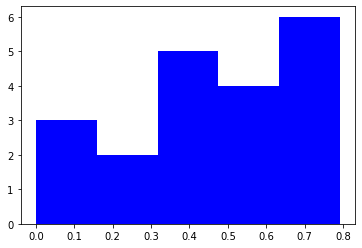

In [ ]:
L = 5
v = np.random.rand(20)
qlevels,_,asslevels = myquant(v,L)
v_max = np.max(v)
delta = v_max/L
x = [i for i in range(L)]
asslevels = sorted(asslevels)
left_edge = [0]
for i in range(L-1):
    a = left_edge[-1]
    left_edge.append(a+delta)
right_edge = left_edge[1::] + [delta]
right_edge = right_edge[:-1] + [left_edge[-1]+delta]
count = [0 for _ in range(L)]
for al in asslevels:
    for i in range(L):
        if(left_edge[i]<=al and al<right_edge[i]):
            count[i] += 1
            break
w = np.array(right_edge) - np.array(left_edge) #variable width, can set this as a scalar also
plt.bar(left_edge, count, width=w, align='edge', color='blue')
plt.show()

##Question 12
Implement the K-means vector quantization algorithm for an arbitrary set of input vectors.

In [ ]:
from sklearn.decomposition import PCA
from scipy.spatial import Voronoi, voronoi_plot_2d

In [ ]:
def Cluster(vectors, means, K):
    clusters = [[] for _ in range(K)]
    for v in vectors:
        min_ind = 0
        min_dis = np.inf
        for i,m in enumerate(means):
            dis = np.linalg.norm(v-m)
            if(dis < min_dis):
                min_ind = i
                min_dis = dis
        clusters[min_ind].append(v)
               
    return clusters

def UpdateMeans(clusters):
    means = []
    for cluster in clusters:
        means.append(np.mean(cluster, axis=0))
    return means

def plot_kmeans(vectors, cluster_means):
    pca = PCA(n_components=2)
    reduced_pts = pca.fit_transform(vectors).transpose()
    reduced_means = pca.fit_transform(cluster_means).transpose()
    vor = Voronoi(reduced_means.transpose())
    plt.figure(figsize=(10,10))
    fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',line_width=2, line_alpha=0.6, point_size=2)
    plt.scatter(reduced_pts[0], reduced_pts[1], color='red')
    plt.show()

In [ ]:
def KMeans(vectors, K):
    n = len(vectors)
    vec_shape = vectors[0].shape
    cluster_means = list(np.array(vectors)[np.random.choice(n, K, replace=False)]) ##FORGI INITIALIZATION
    while(True):
        clusters = Cluster(vectors, cluster_means, K)
        cluster_means = UpdateMeans(clusters)
        if(Cluster(vectors, cluster_means, K)==clusters):
            break
    return clusters, cluster_means

In [ ]:
X1 = -2 * np.random.rand(100,3)
X2 = 1 + 2 * np.random.rand(50,3)
X3 = 4 - 2 * np.random.rand(50,3)
X4 = 6 + 2 * np.random.rand(50,3)
X5 = 8 - 2 * np.random.rand(50,3)
X6 = 10 + 2 * np.random.rand(50,3)

In [ ]:
vectors = list(X1)+list(X2)+list(X3)+list(X4)+list(X5)+list(X6)

In [ ]:
len(vectors)

350

In [ ]:
clusters, cluster_means = KMeans(vectors, 6)

<Figure size 720x720 with 0 Axes>

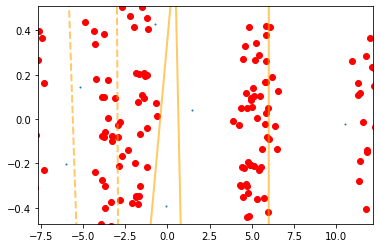

In [ ]:
plot_kmeans(vectors, cluster_means)